In [296]:
import pandas
import matplotlib
import scipy.stats

In [188]:
%matplotlib inline

In [189]:
data = pandas.read_csv('rowery2.csv')

In [190]:
data = data.drop(columns=['Data', 'Godzina', 'Stacja', 'nr roweru'])

In [191]:
data = data[data.apply(lambda x: x['Czy zapiecie elektroniczne'] != x['Czy zapiecie cyfrowe'], axis=1)]

In [192]:
data = data.drop(columns=['Czy zapiecie elektroniczne'])

In [276]:
def getNthDigit(x,n):
    return math.floor((x/(10**n))%10)

data['p1'] = data.apply(lambda x: (getNthDigit(x['Pozostawiony kod'],3)-getNthDigit(x['Kod do otwarcia'],3))%10, axis=1)
data['p2'] = data.apply(lambda x: (getNthDigit(x['Pozostawiony kod'],2)-getNthDigit(x['Kod do otwarcia'],2))%10, axis=1)
data['p3'] = data.apply(lambda x: (getNthDigit(x['Pozostawiony kod'],1)-getNthDigit(x['Kod do otwarcia'],1))%10, axis=1)
data['p4'] = data.apply(lambda x: (getNthDigit(x['Pozostawiony kod'],0)-getNthDigit(x['Kod do otwarcia'],0))%10, axis=1)

In [277]:
data = data.sort_values(['Czy zapiecie cyfrowe','p1','p2','p3','p4'])

In [278]:
data

,Kod do otwarcia,Pozostawiony kod,Czy zapiecie cyfrowe,p1,p2,p3,p4
18,2506,2506,F,0,0,0,0
25,1181,1181,F,0,0,0,0
26,1713,1715,F,0,0,0,2
24,8257,8272,F,0,0,2,5
29,2900,2120,F,0,2,2,0
3,3462,3792,F,0,3,3,0
21,4040,4604,F,0,6,6,4
2,9532,9201,F,0,7,7,9
22,9454,9344,F,0,9,9,0
28,9503,1202,F,2,7,0,9


In [279]:
data1 = data[data['Czy zapiecie cyfrowe'] == 'T']
data2 = data[data['Czy zapiecie cyfrowe'] == 'F']

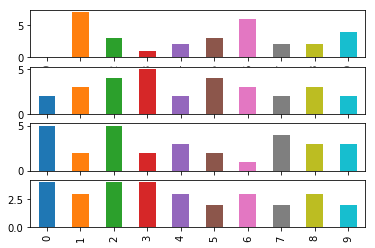

In [288]:
matplotlib.pyplot.subplot(4, 1, 1)
(data.apply(lambda x: getNthDigit(x['Pozostawiony kod'],3),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 2)
(data.apply(lambda x: getNthDigit(x['Pozostawiony kod'],2),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 3)
(data.apply(lambda x: getNthDigit(x['Pozostawiony kod'],1),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 4)
(data.apply(lambda x: getNthDigit(x['Pozostawiony kod'],0),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.show()

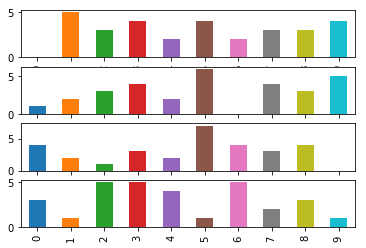

In [287]:
matplotlib.pyplot.subplot(4, 1, 1)
(data.apply(lambda x: getNthDigit(x['Kod do otwarcia'],3),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 2)
(data.apply(lambda x: getNthDigit(x['Kod do otwarcia'],2),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 3)
(data.apply(lambda x: getNthDigit(x['Kod do otwarcia'],1),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 4)
(data.apply(lambda x: getNthDigit(x['Kod do otwarcia'],0),axis=1).value_counts()+pandas.Series([0]*10)).fillna(0).plot(kind='bar')
matplotlib.pyplot.show()

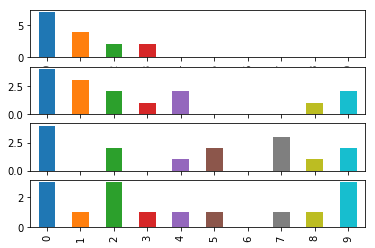

In [204]:
matplotlib.pyplot.subplot(4, 1, 1)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data1.p1.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 2)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data1.p2.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 3)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data1.p3.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 4)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data1.p4.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.show()

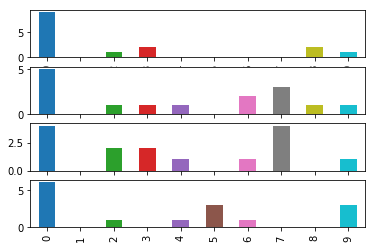

In [205]:
matplotlib.pyplot.subplot(4, 1, 1)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data2.p1.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 2)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data2.p2.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 3)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data2.p3.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.subplot(4, 1, 4)
(pandas.Series([0,0,0,0,0,0,0,0,0,0])+data2.p4.value_counts()).fillna(0).plot(kind='bar')
matplotlib.pyplot.show()

In [227]:
def find_distance(x,y,n):
    return min((x-y)%n,(y-x)%n)


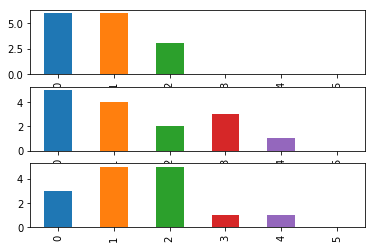

In [243]:
matplotlib.pyplot.subplot(3, 1, 1)
(pandas.Series([0,0,0,0,0,0])+data1.apply(lambda x:find_distance(x.p1,x.p2,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.subplot(3, 1, 2)
(pandas.Series([0,0,0,0,0,0])+data1.apply(lambda x:find_distance(x.p2,x.p3,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.subplot(3, 1, 3)
(pandas.Series([0,0,0,0,0,0])+data1.apply(lambda x:find_distance(x.p3,x.p4,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.show()

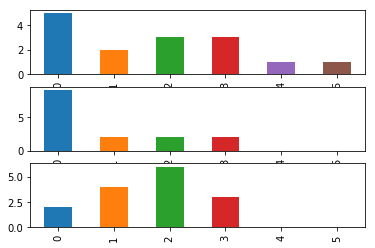

In [244]:
matplotlib.pyplot.subplot(3, 1, 1)
(pandas.Series([0,0,0,0,0,0])+data2.apply(lambda x:find_distance(x.p1,x.p2,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.subplot(3, 1, 2)
(pandas.Series([0,0,0,0,0,0])+data2.apply(lambda x:find_distance(x.p2,x.p3,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.subplot(3, 1, 3)
(pandas.Series([0,0,0,0,0,0])+data2.apply(lambda x:find_distance(x.p3,x.p4,10), axis=1).value_counts()).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.show()

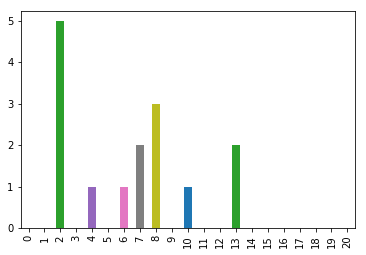

In [271]:
sum_dist = lambda x:find_distance(x.p1,0,10)+find_distance(x.p2,0,10)+find_distance(x.p3,0,10)+find_distance(x.p4,0,10)
matplotlib.pyplot.subplot(1, 1, 1)
(data1.apply(sum_dist, axis=1).value_counts()+pandas.Series([0]*21)).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.show()

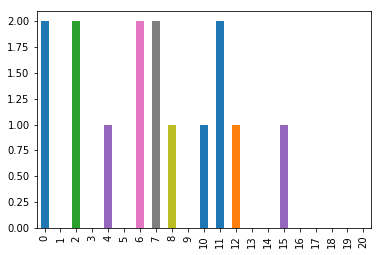

In [270]:
sum_dist = lambda x:find_distance(x.p1,0,10)+find_distance(x.p2,0,10)+find_distance(x.p3,0,10)+find_distance(x.p4,0,10)
matplotlib.pyplot.subplot(1, 1, 1)
(data2.apply(sum_dist, axis=1).value_counts()+pandas.Series([0]*21)).fillna(0).sort_index().plot(kind='bar')
matplotlib.pyplot.show()

In [297]:
#scipy.stats.entropy(data.apply(lambda x: x['p1']*1000+x['p2']*100+x['p3']*10+x['p4'],axis=1).values)

2.682144064995677